# Dimensionality Reduction Using PCA - Breast Cancer Data


In [16]:
#import libraries
import pandas as pd
from pylab import rcParams
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [6]:
#import and preparing the dataset
from sklearn.datasets import load_breast_cancer

#loading de data
breast_cancer = load_breast_cancer()
#creating dataframe with the data
df_breast = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
#filling with the target values
df_breast["target"] = breast_cancer.target
#mapping categorical values
df_breast["target_label"] = df_breast["target"].map({0:"maligno",1:"benigno"})


In [7]:
#count target names
df_breast['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [94]:
df_breast.shape

(569, 31)

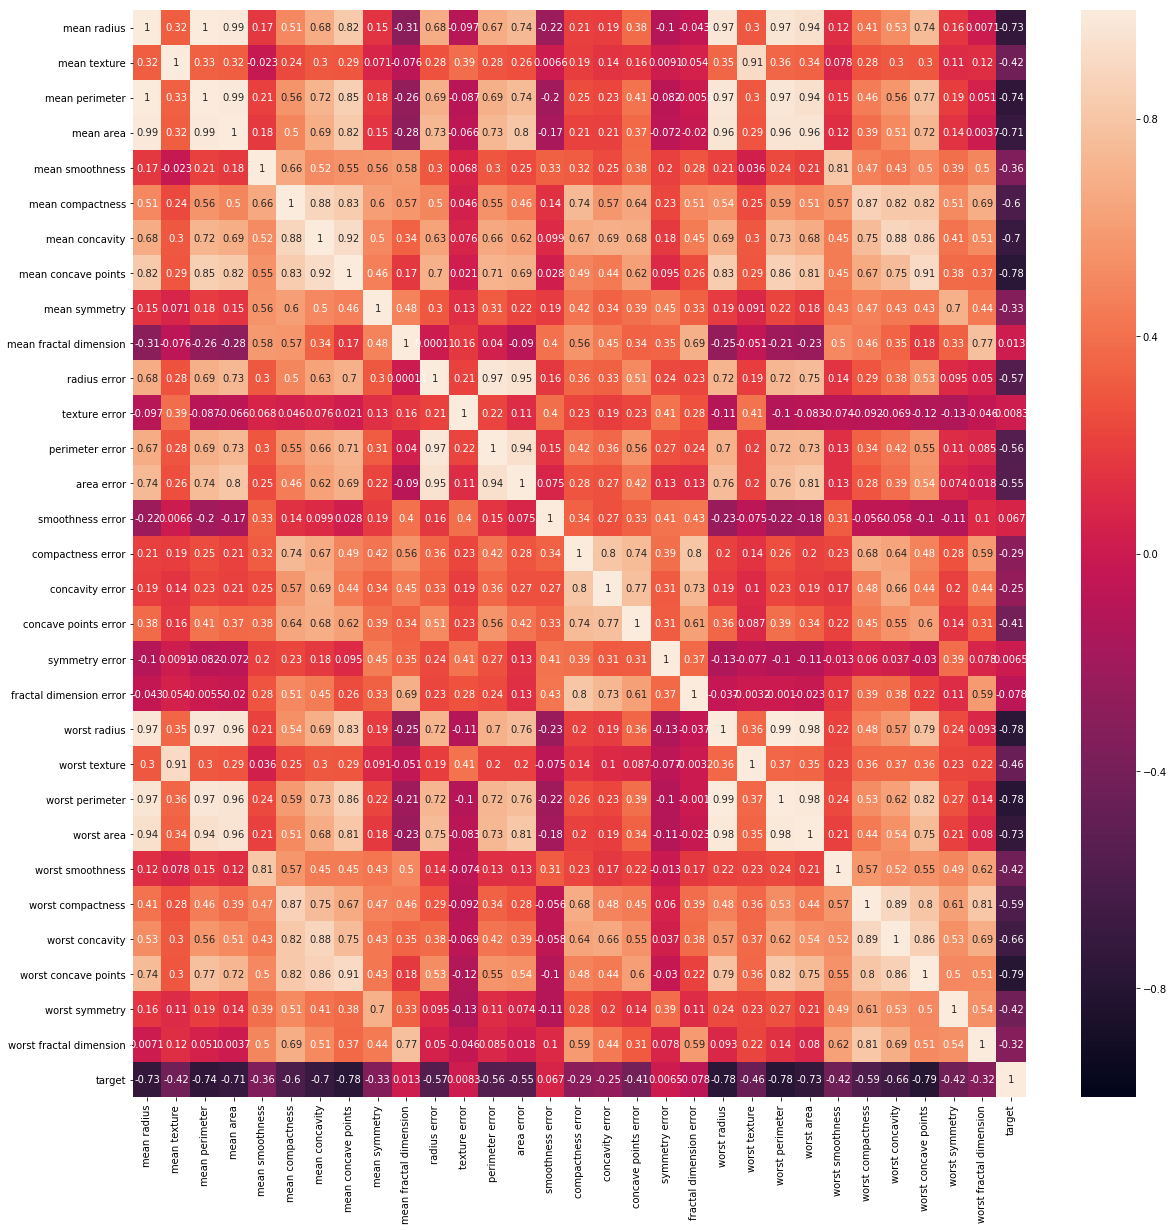

In [8]:
#Ploting Correlations
plt.figure(figsize=(20, 20))
sns.heatmap(df_breast.corr(),vmin=-1,vmax=1,annot=True,cbar=True)


In [9]:
# Standardize the feature matrix
features_names = set(df_breast.columns)-set(["target"])-set(["target_label"])
data_standarzed = StandardScaler().fit_transform(df_breast[features_names].values)




In [10]:
def pca_model(data,retained_variance):
    # Create a PCA that will retain some % of variance
    pca = PCA(n_components=retained_variance, whiten=True)

    # Conduct PCA
    data_pca = pca.fit_transform(data)

    # Show results
    print("Original number of features:", data.shape[1])
    print("Reduced number of features:", data_pca.shape[1])

    return pca

In [11]:
#Visualizing Number of features and reatined variance
pca_model(data_standarzed,0.99)
pca_model(data_standarzed,0.95)
pca_model(data_standarzed,0.90)

Original number of features: 30
Reduced number of features: 17
Original number of features: 30
Reduced number of features: 10
Original number of features: 30
Reduced number of features: 7


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [13]:
pca = pca_model(data_standarzed,len(features_names))


Original number of features: 30
Reduced number of features: 30


In [14]:
def plot_explained_varience(pca):
    '''
    This function received the transformed data and plots it in scree plots
    '''
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.grid(b=True)
    plot = plt.show()


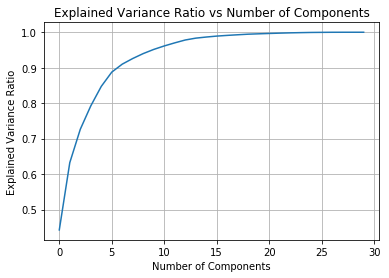

In [18]:
#ploting variance ratio
plot_explained_varience(pca)

In [19]:
#Using 3 components
pca = PCA(n_components=3, whiten=True)
data_pca = pca.fit_transform(data_standarzed)

#Constructing DataFrame
df_pca_3components = pd.DataFrame(data=data_pca)
df_pca_3components["target"] = df_breast["target"].values




In [224]:
pca.components_.shape

(3, 30)

In [20]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


0.7263637090898963

In [21]:
df_pca_3components = pd.DataFrame(data=data_pca)
df_pca_3components["target"] = df_breast["target"].values

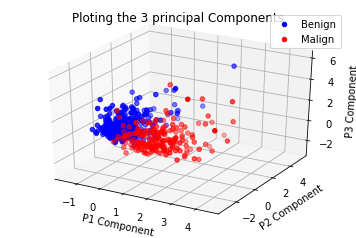

In [22]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#selecting Benign Labels
df_pca_3components_benign = df_pca_3components[df_pca_3components["target"]==1]
#selecting Malign Labels
df_pca_3components_malign = df_pca_3components[df_pca_3components["target"]==0]


x_benign = df_pca_3components_benign[0].values
y_benign = df_pca_3components_benign[1].values
z_benign = df_pca_3components_benign[2].values

#Color of benign will be blue
color_benign = "blue"

x_malign = df_pca_3components_malign[0].values
y_malign = df_pca_3components_malign[1].values
z_malign = df_pca_3components_malign[2].values

#Color of malign will be red
color_malign = "red"

#Ploting Both Benign and Malign
ax.scatter(x_benign,y_benign,z_benign, c=color_benign,label="Benign")
ax.scatter(x_malign,y_malign,z_malign, c=color_malign,label="Malign")
ax.legend()


ax.set_xlabel('P1 Component')
ax.set_ylabel('P2 Component')
ax.set_zlabel('P3 Component')
ax.set_title("Ploting the 3 principal Components")

plt.show()

In [23]:
#Getting components
components = pca.components_
#constructing a dict with feature names and first principal components
feature_weights = dict(zip(features_names, components[0]))
#Sorting
sorted_weights = sorted(feature_weights.items(), key = lambda kv: kv[1])
#Lowest Weights
print('Lowest Weigths: ')
for feature, weight, in sorted_weights[:4]:
    print('\t{:20} {:.3f}'.format(feature, weight))
#Highest Weights
print('Highest Weights: ')
for feature, weight in sorted_weights[-4:]:
    print('\t{:20} {:.3f}'.format(feature, weight))

Lowest Weigths: 
	smoothness error     0.015
	texture error        0.017
	symmetry error       0.042
	mean fractal dimension 0.064
Highest Weights: 
	mean compactness     0.239
	worst concave points 0.251
	mean concavity       0.258
	mean concave points  0.261


In [24]:
sorted_weights[0]

('smoothness error', 0.014531452145774507)

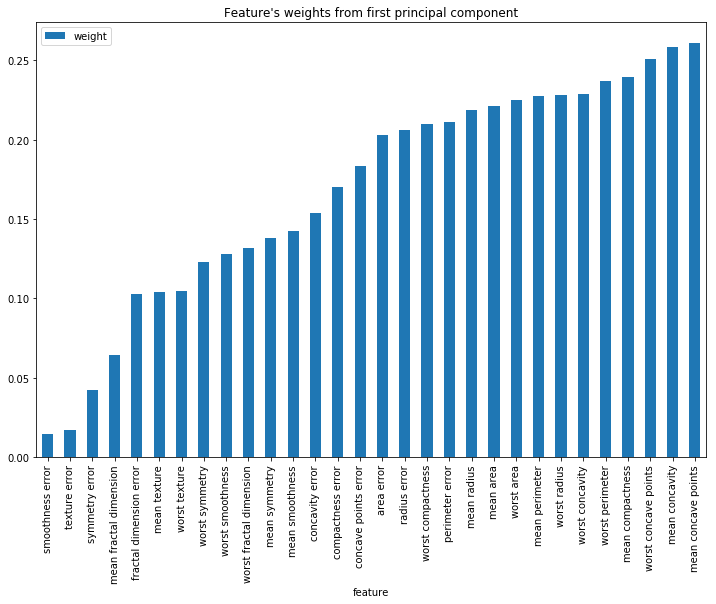

In [241]:
data = []
for feature, weight, in sorted_weights:
    data.append([feature,weight])

df =  pd.DataFrame(data,columns=["feature","weight"])    
df.set_index("feature",inplace=True)

df.plot(kind="bar",title="Feature's weights from first principal component")